In [21]:
from tsfresh import extract_relevant_features
import pandas as pd
from data import citylearn_challenge_2022_phase_1 as competition_data
import os.path as osp

In [22]:
solargen_data_path = osp.join(osp.dirname(competition_data.__file__), "solar_data.csv")
solargen_data = pd.read_csv(solargen_data_path)
y = solargen_data["solar_generation_future"]
timeseries = solargen_data.drop(columns=["solar_generation_future"])
timeseries = timeseries[["month", "hour", "outdoor_dry_bulb", "outdoor_dry_bulb_temperature_predicted_6h", "outdoor_relative_humidity", "outdoor_relative_humidity_predicted_6h", "diffuse_solar_irradiance", "diffuse_solar_irradiance_predicted_6h", "diffuse_solar_irradiance_predicted_24h", "direct_solar_irradiance", "direct_solar_irradiance_predicted_6h", "direct_solar_irradiance_predicted_24h", "solar_generation", "electricity_pricing", "electricity_pricing_predicted_6h", "electricity_pricing_predicted_24h"]]

In [23]:
import xgboost as xgb

train_y = y
train_X = timeseries
xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
remain_num = 99

[17:20:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




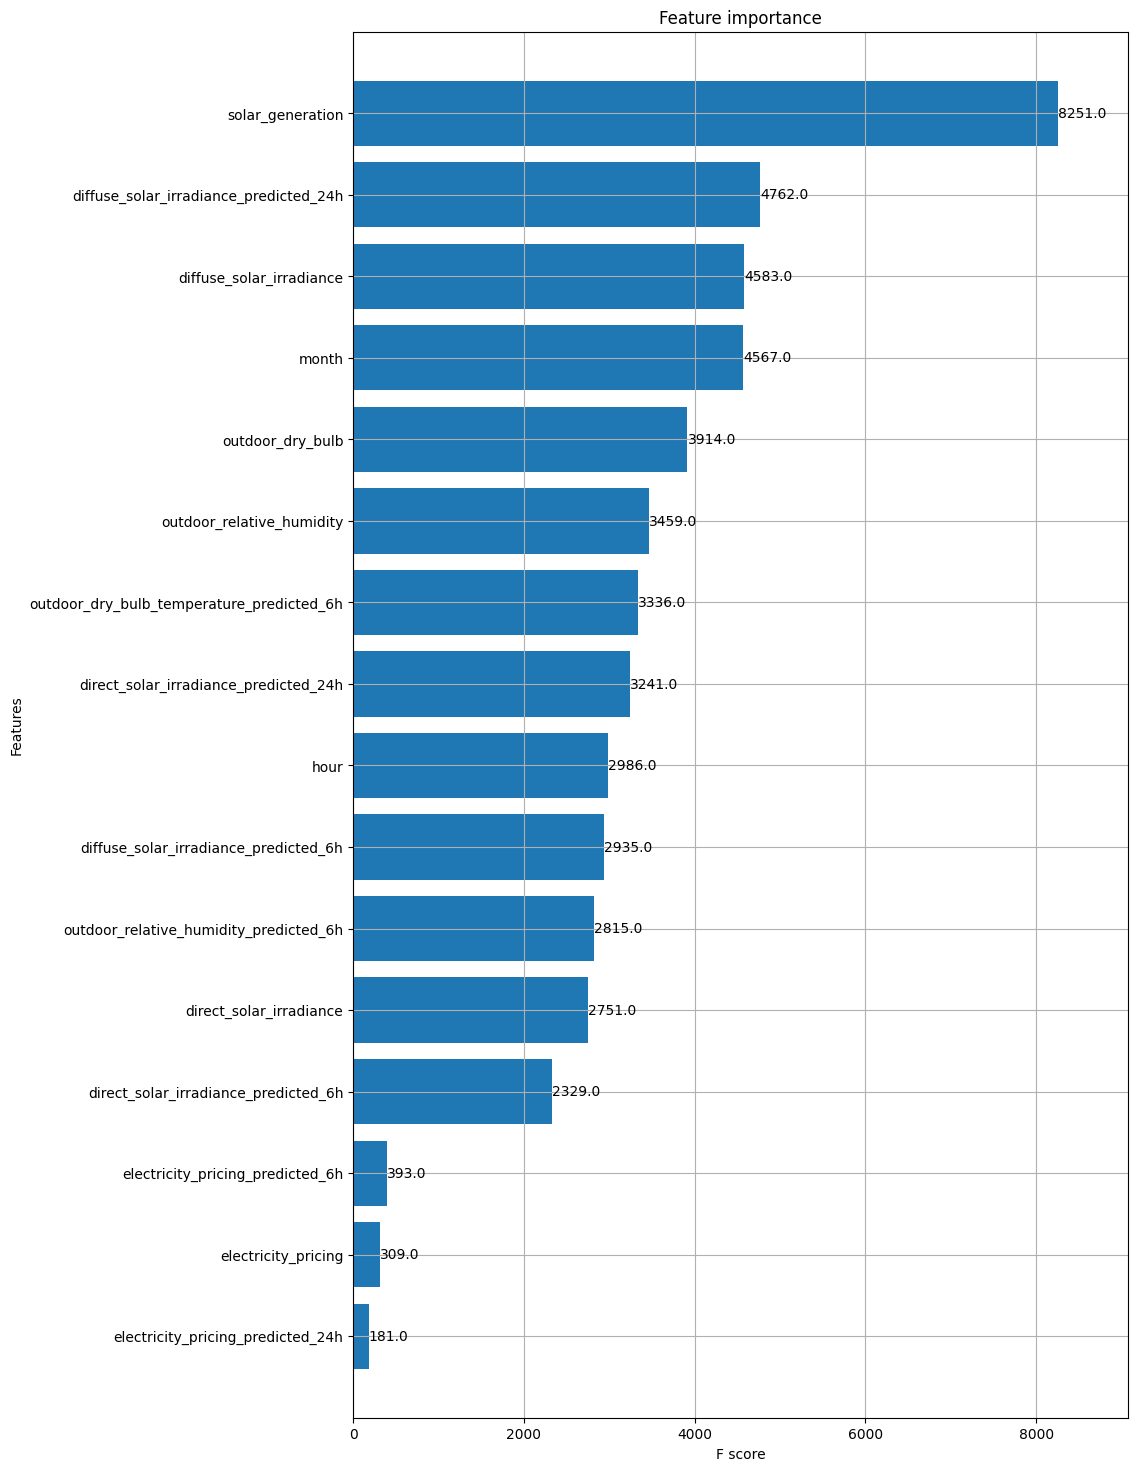

In [24]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10,18))
xgb.plot_importance(model, max_num_features=remain_num, height=0.8, ax=ax)
plt.show()

In [25]:
nsload_data_path = osp.join(osp.dirname(competition_data.__file__), "load_data.csv")
nsload_data = pd.read_csv(nsload_data_path)
y = nsload_data["non_shiftable_load_future"]
timeseries = nsload_data.drop(columns=["non_shiftable_load_future"])
timeseries = timeseries[["month", "hour", "outdoor_dry_bulb", "outdoor_dry_bulb_temperature_predicted_6h", "outdoor_relative_humidity", "outdoor_relative_humidity_predicted_6h", "diffuse_solar_irradiance", "diffuse_solar_irradiance_predicted_6h", "diffuse_solar_irradiance_predicted_24h", "direct_solar_irradiance", "direct_solar_irradiance_predicted_6h", "direct_solar_irradiance_predicted_24h", "electricity_pricing", "electricity_pricing_predicted_6h", "electricity_pricing_predicted_24h", "non_shiftable_load"]]

In [26]:
import xgboost as xgb

train_y = y
train_X = timeseries
xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
remain_num = 99

[17:21:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:21:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




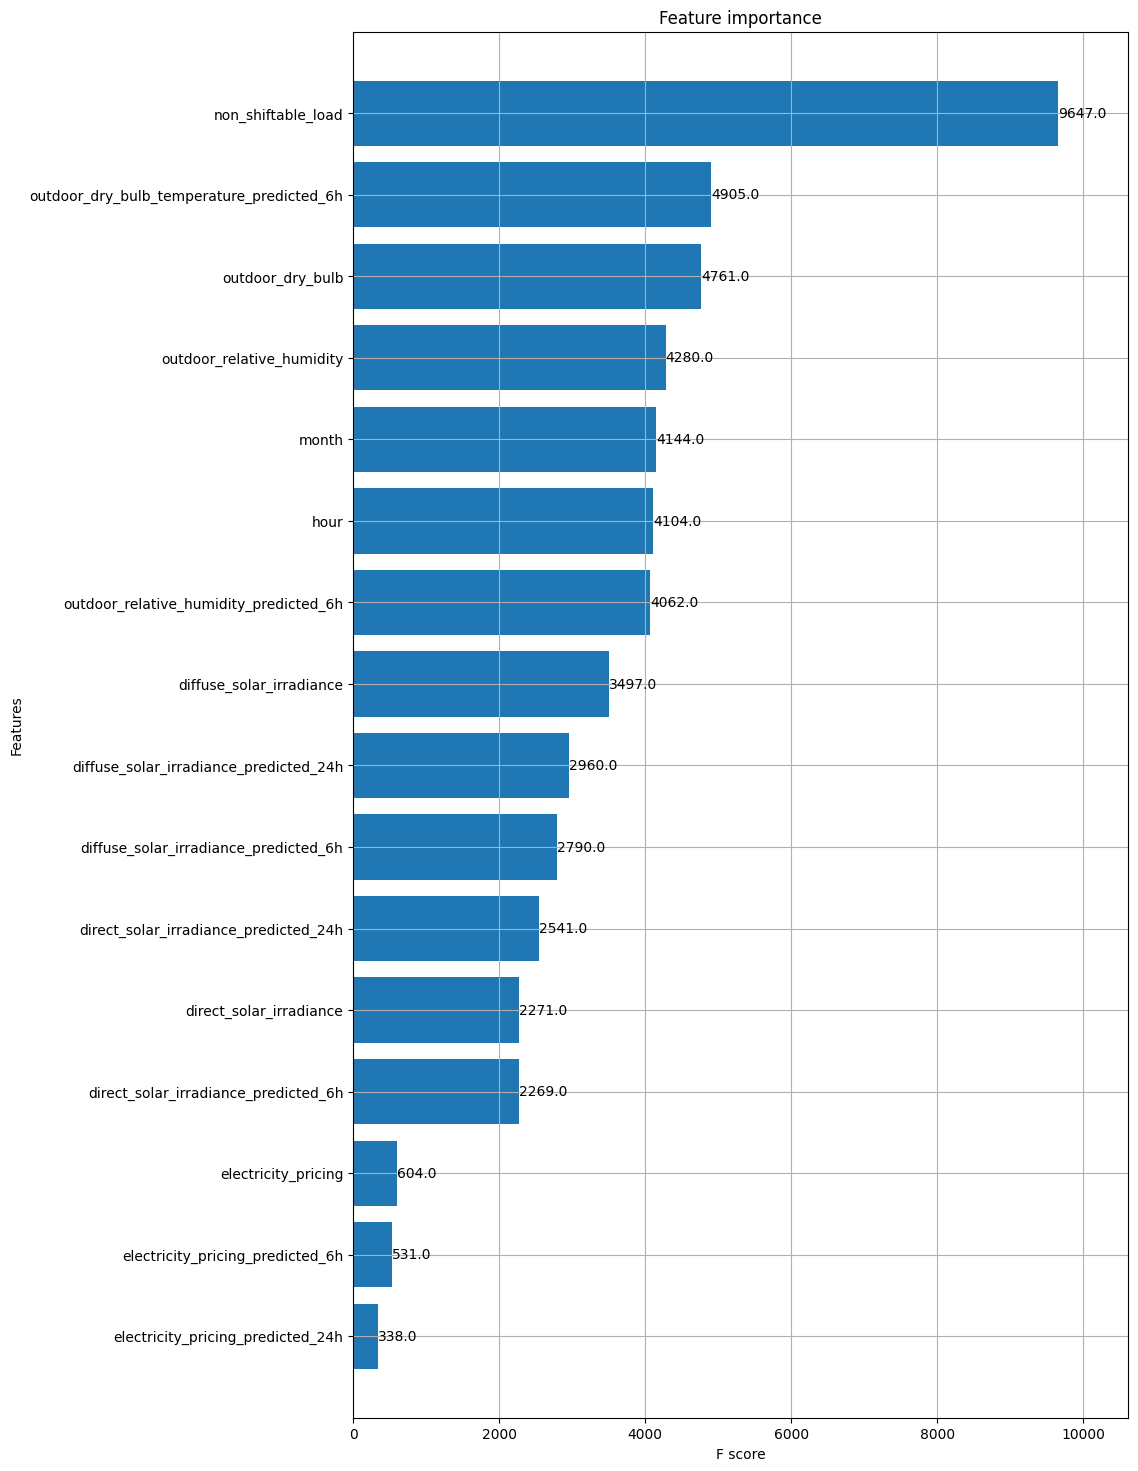

In [27]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10,18))
xgb.plot_importance(model, max_num_features=remain_num, height=0.8, ax=ax)
plt.show()